In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [3]:
## extreme values are outlier

In [4]:
## five point summary
## min,25th,50th,75th,100th

np.quantile(salary,[0,0.25,0.50,0.75,.1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

In [6]:
df = pd.DataFrame(salary,columns = ['salary'])

In [7]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [8]:
## to check the outlier >> distplot,boxplot

plt.figure(figsize = (12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'box plot')

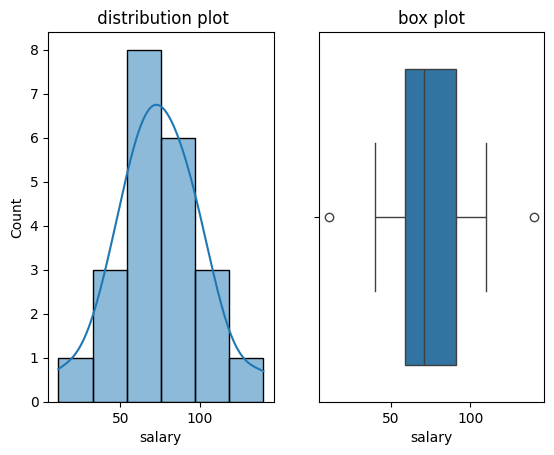

In [16]:
plt.subplot(1,2,1)
sns.histplot(df['salary'],kde = True)
plt.title(" distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df , x="salary")
plt.title("box plot")

In [17]:
## droping the outlier 
## caping the outlier 
## replace with mean/median

In [18]:
## droping the outlier 
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

IQR = Q3 - Q1 
lower_fence  = Q1 - 1.5*IQR
upper_fence  = Q3 + 1.5*IQR

In [19]:
lower_fence

np.float64(11.375)

In [20]:
upper_fence

np.float64(138.375)

In [24]:
df_filtered = df[(df.salary>=lower_fence) & (df.salary<=upper_fence) ]

In [26]:
df_filtered.shape

(20, 1)

Text(0.5, 1.0, 'box plot')

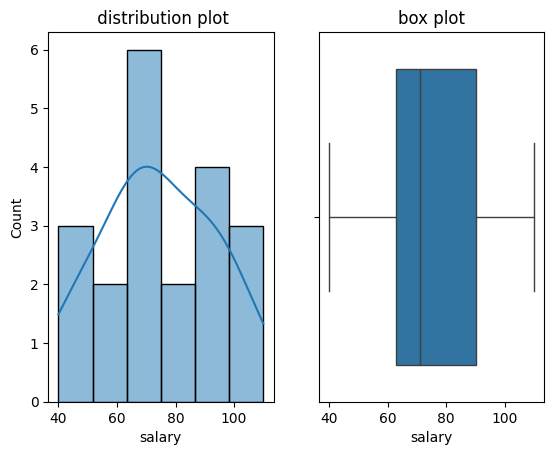

In [27]:
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'],kde = True)
plt.title(" distribution plot")

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered , x="salary")
plt.title("box plot")

In [28]:
## impuatation with mean and median

df["salary_imputed_mean"] = np.where((df.salary >= upper_fence) | (df.salary<=lower_fence,df['salary'].mean() ,df['salary']))

ValueError: setting an array element with a sequence.

In [29]:
df["salary_imputed_mean"] = np.where(
    (df.salary >= upper_fence) | (df.salary <= lower_fence),
    df['salary'].mean(),
    df['salary']
)


In [30]:
df

,salary,salary_imputed_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


Text(0.5, 1.0, 'The box plot of salary')

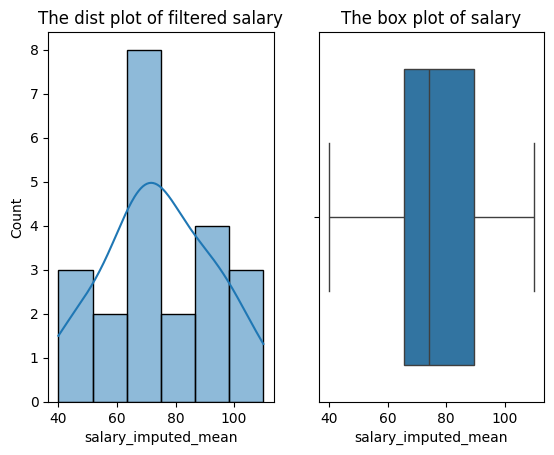

In [32]:
plt.subplot(1, 2, 1)
sns.histplot(df['salary_imputed_mean'], kde = True)
plt.title("The dist plot of filtered salary")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'salary_imputed_mean')
plt.title("The box plot of salary")

In [33]:
df["salary_imputed_median"] = np.where(
    (df.salary >= upper_fence) | (df.salary <= lower_fence),
    df['salary'].median(),
    df['salary']
)


In [34]:
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


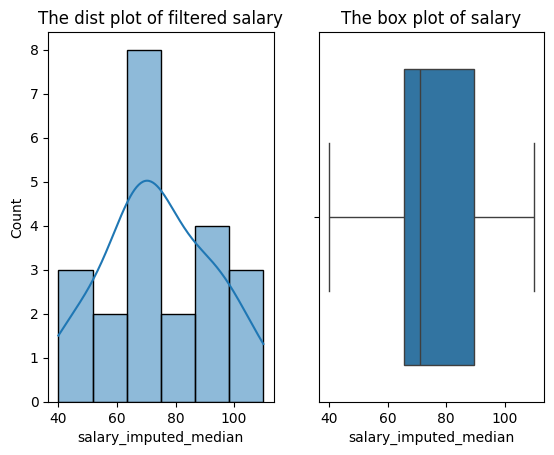

In [35]:
plt.subplot(1, 2, 1)
sns.histplot(df['salary_imputed_median'], kde=True)
plt.title("The dist plot of filtered salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='salary_imputed_median')
plt.title("The box plot of salary")

plt.show()

In [36]:
## capping 
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [37]:
## capping>> replacing with the nearest value which is not outlier

In [38]:
lower_cap = df['salary'].quantile(0.05)## lower cap 5th percentile
upper_cap = df['salary'].quantile(0.095)## upeer cap at 95th percentile

In [39]:
lower_cap

np.float64(40.25)

In [40]:
upper_cap

np.float64(44.975)

In [45]:
## replace outliers with cap 
df['salary_capped'] = np.where(df['salary']<lower_cap,lower_cap,
        np.where(df['salary']>upper_cap,upper_cap,
                df['salary']))

In [43]:
df

,salary,salary_imputed_mean,salary_imputed_median,salary_cap
0,11,74.318182,71.0,40.250
1,40,40.000000,40.0,40.250
2,45,45.000000,45.0,44.975
3,68,68.000000,68.0,44.975
4,65,65.000000,65.0,44.975
5,68,68.000000,68.0,44.975
6,78,78.000000,78.0,44.975
7,90,90.000000,90.0,44.975
8,57,57.000000,57.0,44.975
9,74,74.000000,74.0,44.975


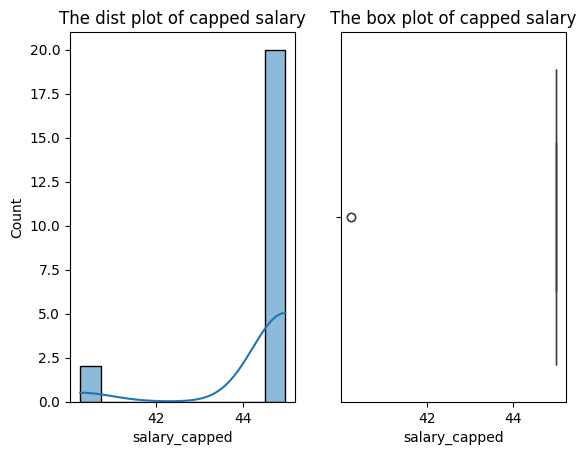

In [46]:
plt.subplot(1, 2, 1)
sns.histplot(df['salary_capped'], kde=True)
plt.title("The dist plot of capped salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='salary_capped')
plt.title("The box plot of capped salary")

plt.show()